In [4]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as random
random.seed(100)
import time
N =1000

In [23]:
for l in range(50):
    t=0
    A = np.zeros(shape=(N,4))
    initial1 = random.randint(0,N-1)


    I = np.zeros(N, dtype=np.int64)

    I[initial1] = 1
    A[:,0] = np.arange(0,N)
    A[:,1]= np.random.uniform(0,D, size = N)
    A[:,2] = np.random.uniform(0,D, size =N)
    A[:,3] = np.random.pareto(2, size = N) + 0.5
    recovind = [i for i in range(np.size(I)) if I[i]==2]
    infectind = [i for i in range(np.size(I)) if I[i]==1]
    susceptind = [i for i in range(np.size(I)) if I[i]==0]

    Sus = [len(susceptind)]
    Rec = [len(recovind)]
    Inf=[len(infectind)]
    time_plot=[0]

    start_time = time.time()


    while sum(I == 1) > 0:
        ξ = np.random.uniform(-np.pi, np.pi, size = N)
        V = (vel*np.cos(ξ), vel*np.sin(ξ))
        p = np.random.uniform(0,1, size = N)

        for agent in A[:,0]:
            agent = int(agent)
            if p[agent] <Prob:
                A[agent, 1] = np.random.uniform(0,D)
                A[agent, 2] = np.random.uniform(0,D)
            else:
                A[agent, 1] = (A[agent, 1]+V[0][agent])%D
                A[agent, 2] = (A[agent, 2]+V[1][agent])%D

        for node in np.where(I==1)[0]:
            recover = np.random.uniform(0,1)
            if recover<mu:
                I[node] = 2


        N_ir = np.zeros(len(A[:,0])) #number of agents in nbhd updates for each time step
        infect = [A[a,0] for a in np.where(I==1)[0]]
        for ind1 in A[:,0]:
            ind1 = int(ind1)
            for ind2 in infect:
                ind2 = int(ind2)
                if ((A[ind1, 1] - A[ind2, 1])**2+ (A[ind1, 2]-A[ind2, 2])**2 < A[ind1,3]**2 and (I[ind1]==0)):
                    N_ir[ind1] +=1
            p_beta = np.random.uniform(0,1)
            inf = 1-((1-lamb)**N_ir[ind1])
            if ((p_beta<inf) and (I[ind1]==0)):
                I[ind1]= 1


        t = t + 1
        infectind = [i for i in range(np.size(I)) if I[i]==1]
        recovind = [i for i in range(np.size(I)) if I[i]==2]
        susceptind = [i for i in range(np.size(I)) if I[i]==0]

        Sus.append(len(susceptind))
        Rec.append(len(recovind))
        Inf.append(len(infectind))
        time_plot.append(t)

        xinfectplot = A[:,1][infectind]
        yinfectplot = A[:,2][infectind]
        xrecplot = A[:,1][recovind]
        yrecplot = A[:,2][recovind]
        xsusceptplot = A[:,1][susceptind]
        ysusceptplot = A[:,2][susceptind]

        average_inf1.append(Inf)
    print(l)
    print("--- %s seconds ---" % (time.time() - start_time))

0
--- 30.368770122528076 seconds ---
1
--- 27.960932970046997 seconds ---
2
--- 27.552921056747437 seconds ---
3
--- 28.77985382080078 seconds ---
4
--- 29.36702299118042 seconds ---
5
--- 25.525383949279785 seconds ---
6
--- 28.927626609802246 seconds ---
7
--- 29.203911066055298 seconds ---
8
--- 27.682823419570923 seconds ---
9
--- 28.875845193862915 seconds ---
10
--- 29.33945918083191 seconds ---
11
--- 27.59857678413391 seconds ---
12
--- 30.411481618881226 seconds ---
13
--- 26.897839546203613 seconds ---
14
--- 27.795948028564453 seconds ---
15
--- 27.258990049362183 seconds ---
16
--- 29.191402673721313 seconds ---
17
--- 28.757314920425415 seconds ---
18
--- 28.843031883239746 seconds ---
19
--- 27.481548070907593 seconds ---
20
--- 27.792448043823242 seconds ---
21
--- 29.21933078765869 seconds ---
22
--- 31.53387999534607 seconds ---
23
--- 30.429774522781372 seconds ---
24
--- 28.78819990158081 seconds ---
25
--- 29.066694498062134 seconds ---
26
--- 27.795620679855347 sec

In [33]:
# G = nx.barabasi_albert_graph(N,m)
G= nx.watts_strogatz_graph(N, m, k, seed=None)
# G = nx.gnp_random_graph(N, 1, seed=None, directed=False)
# G = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [23]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [55]:
ks_ba, Pks_ba = degree_distribution(G)
mean_deg_ws = 0
var_deg_ws = 0
for j in range(len(ks_ba)):
    mean_deg_ws += ks_ba[j]*Pks_ba[j]
    var_deg_ws += (ks_ba[j]**2)*Pks_ba[j]


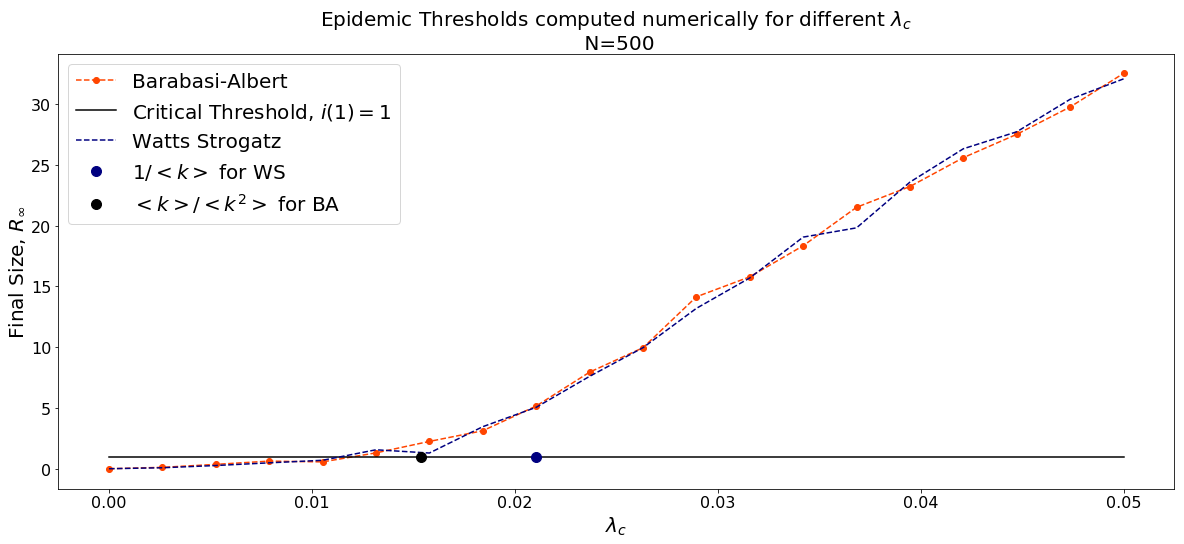

In [56]:
plt.figure(figsize = (20,8))
plt.plot(beta/0.05, infect_no_r, 'o--', c='orangered', label = 'Barabasi-Albert')
plt.plot(beta/0.05, np.ones(len(beta)), '-',alpha = 1, c = 'k', label = 'Critical Threshold, $i(1) = 1$')
plt.plot(beta/0.05, infect_no_ws, '--',c = 'navy', label = 'Watts Strogatz')
plt.plot(1/mean_deg_ws, 1,'o',ms =10, c = 'navy', label = '$1/ <k> $ for WS')

plt.plot(mean_deg_r/var_deg_r, 1, 'o', ms = 10, c='k', label = '$<k>/<k^2>$ for BA')


plt.xlabel('$λ_c$', fontsize = 20)
plt.ylabel('Final Size, $R_{\infty}$', fontsize = 20)
plt.legend(fontsize = 20, loc = 'upper left')
plt.title('Epidemic Thresholds computed numerically for different $λ_c$ \n N=500', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig('critical')

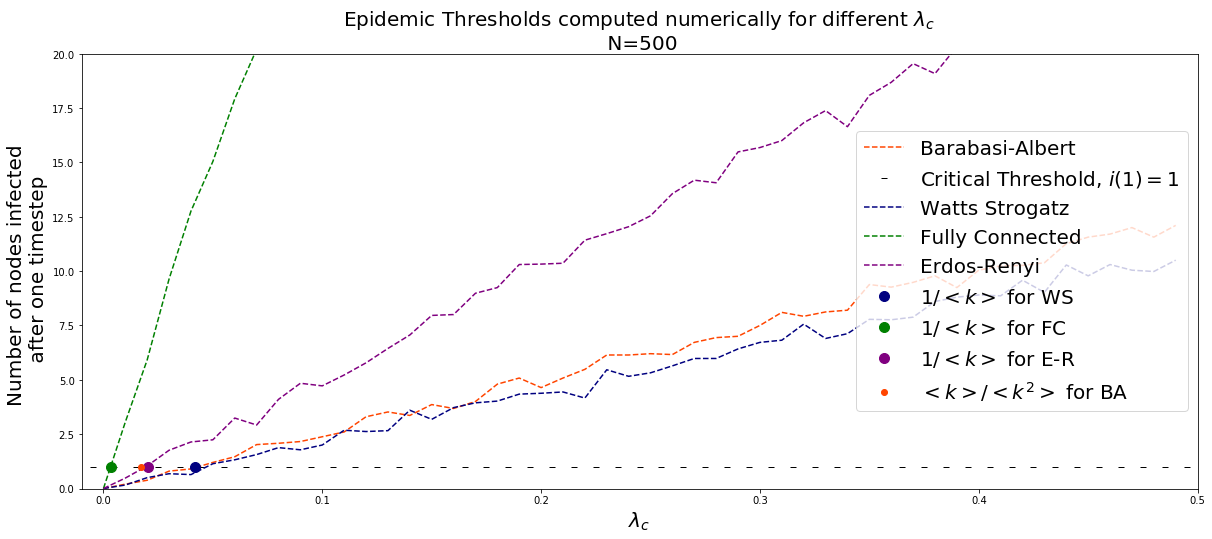

In [86]:
plt.figure(figsize = (20,8))
plt.plot(lam_crit, infect_no, '--', c='orangered', label = 'Barabasi-Albert')
plt.plot(np.arange(-0.005, 0.6, 0.01), np.ones(len(np.arange(-0.01, 0.6, 0.01))), '_',alpha = 1, c = 'k', label = 'Critical Threshold, $i(1) = 1$')
plt.plot(lam_crit, infect_no_ws, '--',c = 'navy', label = 'Watts Strogatz')
plt.plot(lam_crit, infect_no_fc, '--', c = 'green', label = 'Fully Connected')
plt.plot(lam_crit, infect_no_r,'--', c = 'purple', label = 'Erdos-Renyi')
plt.plot(1/mean_deg_ws, 1,'o',ms =10, c = 'navy', label = '$1/ <k> $ for WS')
plt.plot(1/mean_deg_fc, 1,'o',ms =10, c = 'green', label = '$1/ <k> $ for FC')
plt.plot(1/mean_deg_r, 1,'o',ms =10, c = 'purple', label = '$1/ <k> $ for E-R ')
plt.plot(mean_deg_ba/var_deg_ba, 1, 'o', c='orangered', label = '$<k>/<k^2>$ for BA')

plt.xlim((-0.01,0.5))
plt.ylim((0,20))
plt.xlabel('$λ_c$', fontsize = 20)
plt.ylabel('Number of nodes infected \n after one timestep', fontsize = 20)
plt.legend(fontsize = 20, loc = 'center right')
plt.title('Epidemic Thresholds computed numerically for different $λ_c$ \n N=500', fontsize = 20)
plt.savefig('critical')

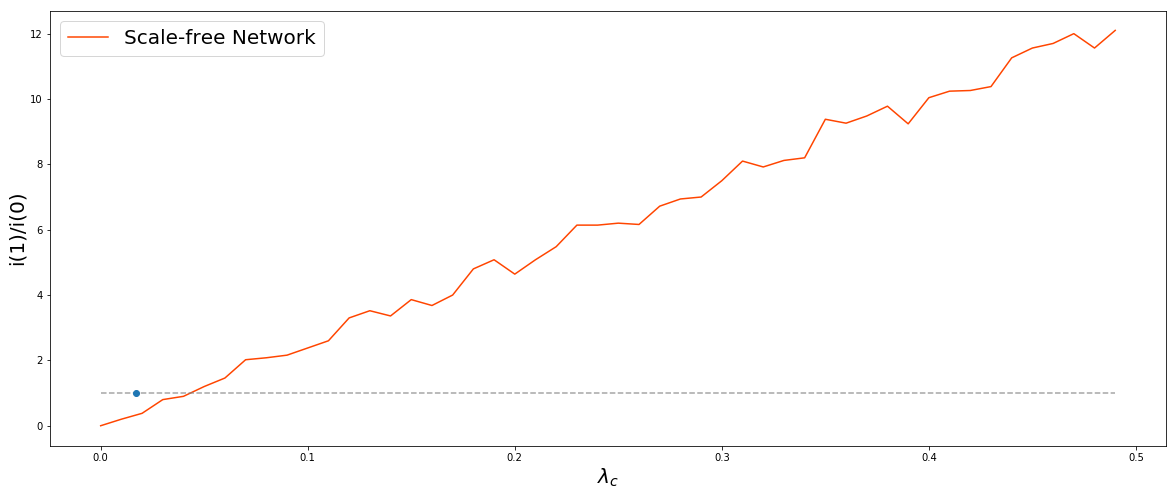

In [13]:
plt.figure(figsize = (20,8))
plt.plot(lam_crit, infect_no, c='orangered', label = 'Scale-free Network')
plt.plot(lam_crit, np.ones(len(lam_crit)), '--', alpha = 0.7, c = 'grey')
# plt.plot(lam_crit, infect_no_ws, c = 'navy', label = 'Small world network')
# plt.plot(lam_crit, infect_no_r, c = 'purple', label = 'Random')
# plt.plot(1/8, 1,'o',ms =10, c = 'k', alpha = 0.7, label = '$1/ <k> $')
plt.plot(mean_deg_ba/var_deg_ba, 1, 'o')
plt.xlabel('$λ_c$', fontsize = 20)
plt.ylabel('i(1)/i(0)', fontsize = 20)
plt.legend(fontsize = 20)
# plt.savefig('critical')